In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# Data Preprocessing
# Define preprocessing functions or use ImageDataGenerator for real-time augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest')

# Load the dataset
train_generator = train_datagen.flow_from_directory(
    directory="D:/DATASET/CNN/ballooning/train",
    target_size=(224, 224),  # ResNet50 input size
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42)

Found 27698 images belonging to 2 classes.


Number of images before resampling:
Class 0: 26921
Class 1: 779

Number of images after resampling:
Class 0: 13850
Class 1: 13850


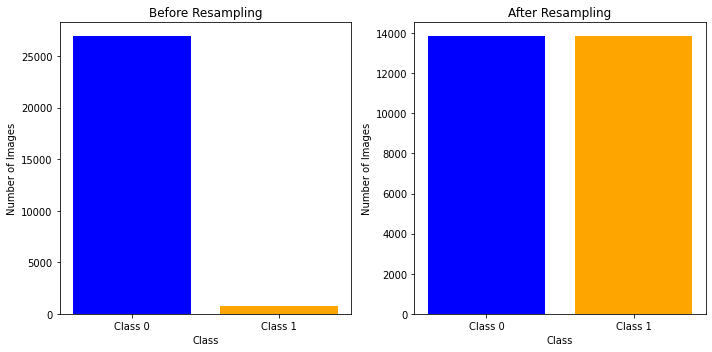

In [6]:
import os
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Paths to class directories
class1_dir = "D:/DATASET/CNN/ballooning/train/1"
class0_dir = "D:/DATASET/CNN/ballooning/train/0"

# Get list of filenames in each class directory
class1_files = [os.path.join(class1_dir, filename) for filename in os.listdir(class1_dir)]
class0_files = [os.path.join(class0_dir, filename) for filename in os.listdir(class0_dir)]

# Calculate the average number of images per class
avg_images_per_class = (len(class0_files) + len(class1_files)) // 2

# Oversample class 1
class1_oversampled = resample(class1_files, replace=True, n_samples=avg_images_per_class, random_state=42)

# Downsample class 0
class0_downsampled = resample(class0_files, replace=False, n_samples=avg_images_per_class, random_state=42)

# Combine both classes
balanced_data = np.concatenate((class0_downsampled, class1_oversampled))

# Shuffle the balanced data
np.random.shuffle(balanced_data)

# Create labels for balanced data
y_balanced = [0] * len(class0_downsampled) + [1] * len(class1_oversampled)

# Display the number of images before and after resampling
print("Number of images before resampling:")
print("Class 0:", len(class0_files))
print("Class 1:", len(class1_files))
print("\nNumber of images after resampling:")
print("Class 0:", len(class0_downsampled))
print("Class 1:", len(class1_oversampled))

# Plot histograms
plt.figure(figsize=(10, 5))

# Before resampling
plt.subplot(1, 2, 1)
plt.bar(['Class 0', 'Class 1'], [len(class0_files), len(class1_files)], color=['blue', 'orange'])
plt.title('Before Resampling')
plt.xlabel('Class')
plt.ylabel('Number of Images')

# After resampling
plt.subplot(1, 2, 2)
plt.bar(['Class 0', 'Class 1'], [len(class0_downsampled), len(class1_oversampled)], color=['blue', 'orange'])
plt.title('After Resampling')
plt.xlabel('Class')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()

In [7]:
# Load ResNet50 base model without top layers
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_balanced, y_balanced, epochs=5, batch_size=32, validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'X_balanced' is not defined